In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing[1].csv to Housing[1] (1).csv


In [3]:
df = pd.read_csv('Housing[1].csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Preprocessing the data
df_processed = pd.get_dummies(df, drop_first=True)

In [6]:
#Splitting features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Training Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.6529


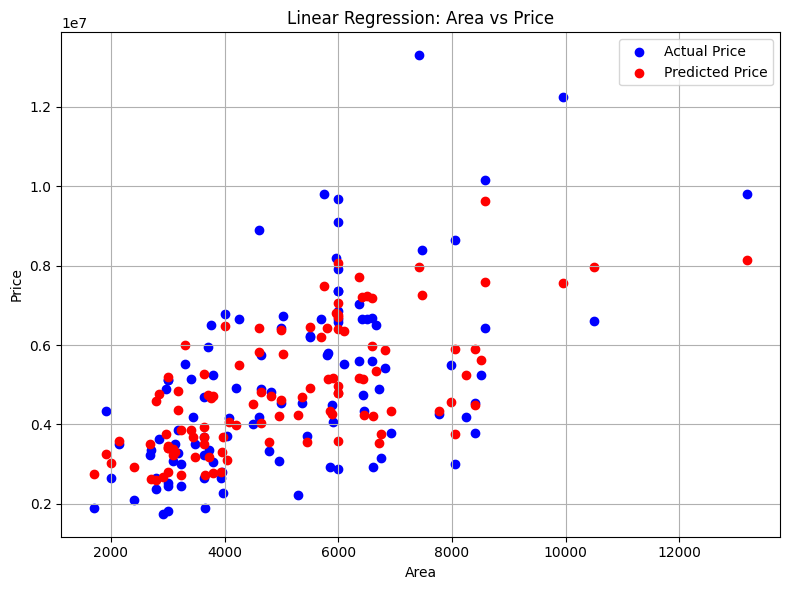

In [11]:
# Plot: Area vs Price
plt.figure(figsize=(8, 6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Influential Features:")
print(coeff_df.head(10))


Top 10 Most Influential Features:
                         Feature   Coefficient
2                      bathrooms  1.094445e+06
9            airconditioning_yes  7.914267e+05
8            hotwaterheating_yes  6.846499e+05
10                  prefarea_yes  6.298906e+05
12  furnishingstatus_unfurnished -4.136451e+05
3                        stories  4.074766e+05
7                   basement_yes  3.902512e+05
5                   mainroad_yes  3.679199e+05
6                  guestroom_yes  2.316100e+05
4                        parking  2.248419e+05


In [13]:
coeff_df.to_csv('coefficients.csv', index=False)
files.download('coefficients.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>